In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

from two4two import blender
from two4two import scene_parameters
from two4two.utils import render_grid

# Introduction
In this example notebook we are going to create an image dataset with many images and several dataset splits. In a flowwing tutorial, the resulting image folder will later be used to train biases and unbiases deep learning models (with Keras+Tensorflow).

In this example we are going to create a dataset that has a bias, meaning that Sticky and Strechy will have a specific stucture. We are also going to create an unbiases dataset.

First we are going to create an unbiases dataset. This means it will contain images of sticky and stretchy and both will  be made of of block of various structure types. 

The core infrastructure of the two4two data generator are:
* The blender module - which takes insturction about a scene and generates an image 

In [2]:
sampler = scene_parameters.ColorBiasedSceneParameterSampler()
params = [sampler.sample() for _ in range(15)]

CalledProcessError: Command '['/home/martin/242_37_env/lib/python3.7/site-packages/two4two/execute_blender.sh', '/home/martin/.cache/two4two', '/home/martin/242_37_env/lib/python3.7/site-packages/two4two/_blender/render_samples.py', '/tmp/tmpuilhu0ks/parameters_chunk_1.json', '/tmp/tmpuilhu0ks']' returned non-zero exit status 1.

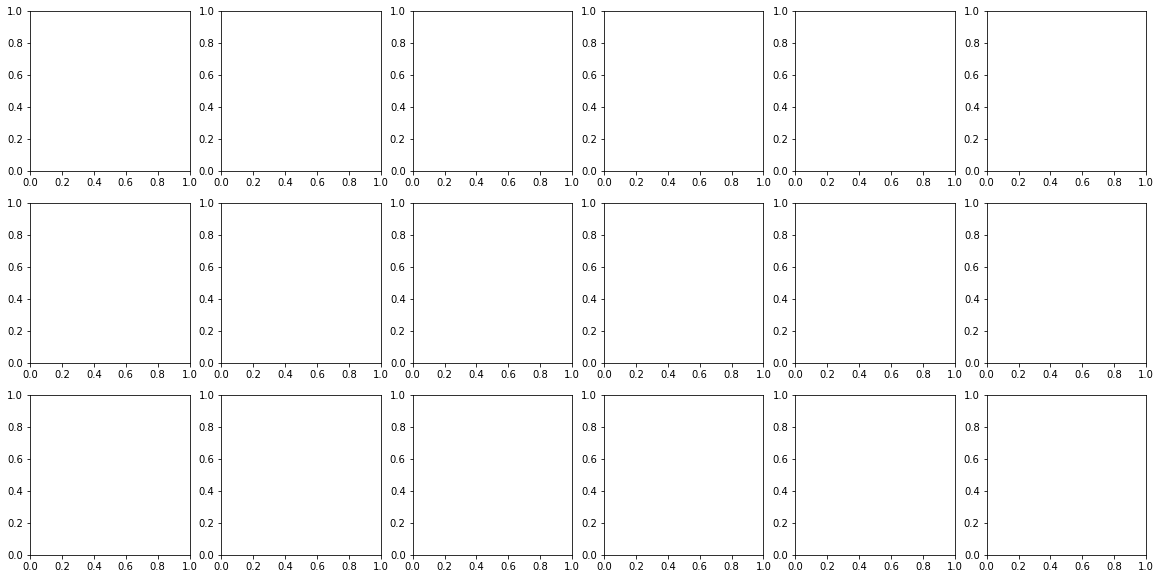

In [3]:
render_grid(params,enforce_equal_class_distribution=False)

In [5]:
for (img, param) in  blender.render(params, print_output = True, download_blender=True):
    pass

Blender 2.83.9 (hash 4abfc0bcd5c8 built 2020-11-11 07:32:06)
/run/user/1001/gvfs/ non-existent directory
found bundled python: /home/martin/.cache/two4two/blender/2.83/python

Blender quit



FileNotFoundError: No such file: '/tmp/tmp4g3u2o9l/86a54951-2a86-4558-8fe2-e17f99ccebf0.png'

blender.render?

In [16]:
save_dir = os.path.join(os.getcwd(),'generated_data')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
print("Saving to",save_dir)

Saving to /home/martin/242/examples/generated_data


First we define we use the Parameters object to create some random paramters which will later be used to render images that correspond to these parameters. We have to define a location where the parameters should be save.

Here we generate the parameters for 5000 images of stretchy and sticky with random surface structure.

In [25]:
unbiased_training_params_file = os.path.join(save_dir, 'unbiasedTraining.json')
params = Parameters()
params.generate_many(n = num_samples,
                     save_location = unbiased_training_params_file,
                     object_types = 'random',
                     structure_types = 'random')

In [26]:
output_dir = os.path.join(save_dir,'unbiasedTraining')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Defining several workers is faster, choose the number of proccess and chunck size according to your processor architecture.

In [27]:
Blender(parameter_file = unbiased_training_params_file,
        output_dir = output_dir,
        n_processes = 16,
        chunk_size = 50)

Split /home/martin/242/examples/generated_data/unbiasedTraining.json into 100 chunks.


In [19]:
biased_training_params_file = os.path.join(save_dir, 'biasedTraining.json')
biased_training_params = Parameters()
biased_training_params.generate_many(n = num_samples/2,
                     save_location = biased_training_params_file,
                     object_types = 'sticky',
                     structure_types = 'cubes')

In [20]:
biased_training_params.generate_many(n = num_samples/2,
                     save_location = biased_training_params_file,
                     object_types = 'stretchy',
                     structure_types = 'spheres')

**Caution** the previously created params file hinders the execution of blender - currently we need to move the file away to concat it later on. This is not elegant!

In [21]:
output_dir = os.path.join(save_dir,'biasedTraining')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [22]:
Blender(parameter_file = biased_training_params_file,
        output_dir = output_dir,
        n_processes = 16,
        chunk_size = 50)

Split /home/martin/242/examples/generated_data/biasedTraining.json into 100 chunks.
